In [1]:
#import libraries
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
import matplotlib
params={
    'text.usetex':True,
    'font.family':'serif',
    'xtick.minor.visible':True,
    'ytick.minor.visible':True,
    'xtick.top':True,
    'ytick.left':True,
    'ytick.right':True,
    'xtick.direction':'out',
    'ytick.direction':'out',
    'xtick.minor.size':2.5,
    'xtick.major.size':5,
    'ytick.minor.size':2.5,
    'ytick.major.size':5,
    'axes.axisbelow':True
}
matplotlib.rcParams.update(params)

In [3]:
#open lightcurves
lc1 = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q0.lc')
lc2 = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q1.lc')
lc3 = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q2.lc')
lc4 = fits.open('AS1A06_002T02_9000003206_21631cztM0_level2_quad_clean_Q3.lc')

In [4]:
#create lc data array
lc1_data = lc1[1].data
lc2_data = lc2[1].data
lc3_data = lc3[1].data
lc4_data = lc4[1].data

lc = [lc1_data, lc2_data, lc3_data, lc4_data]

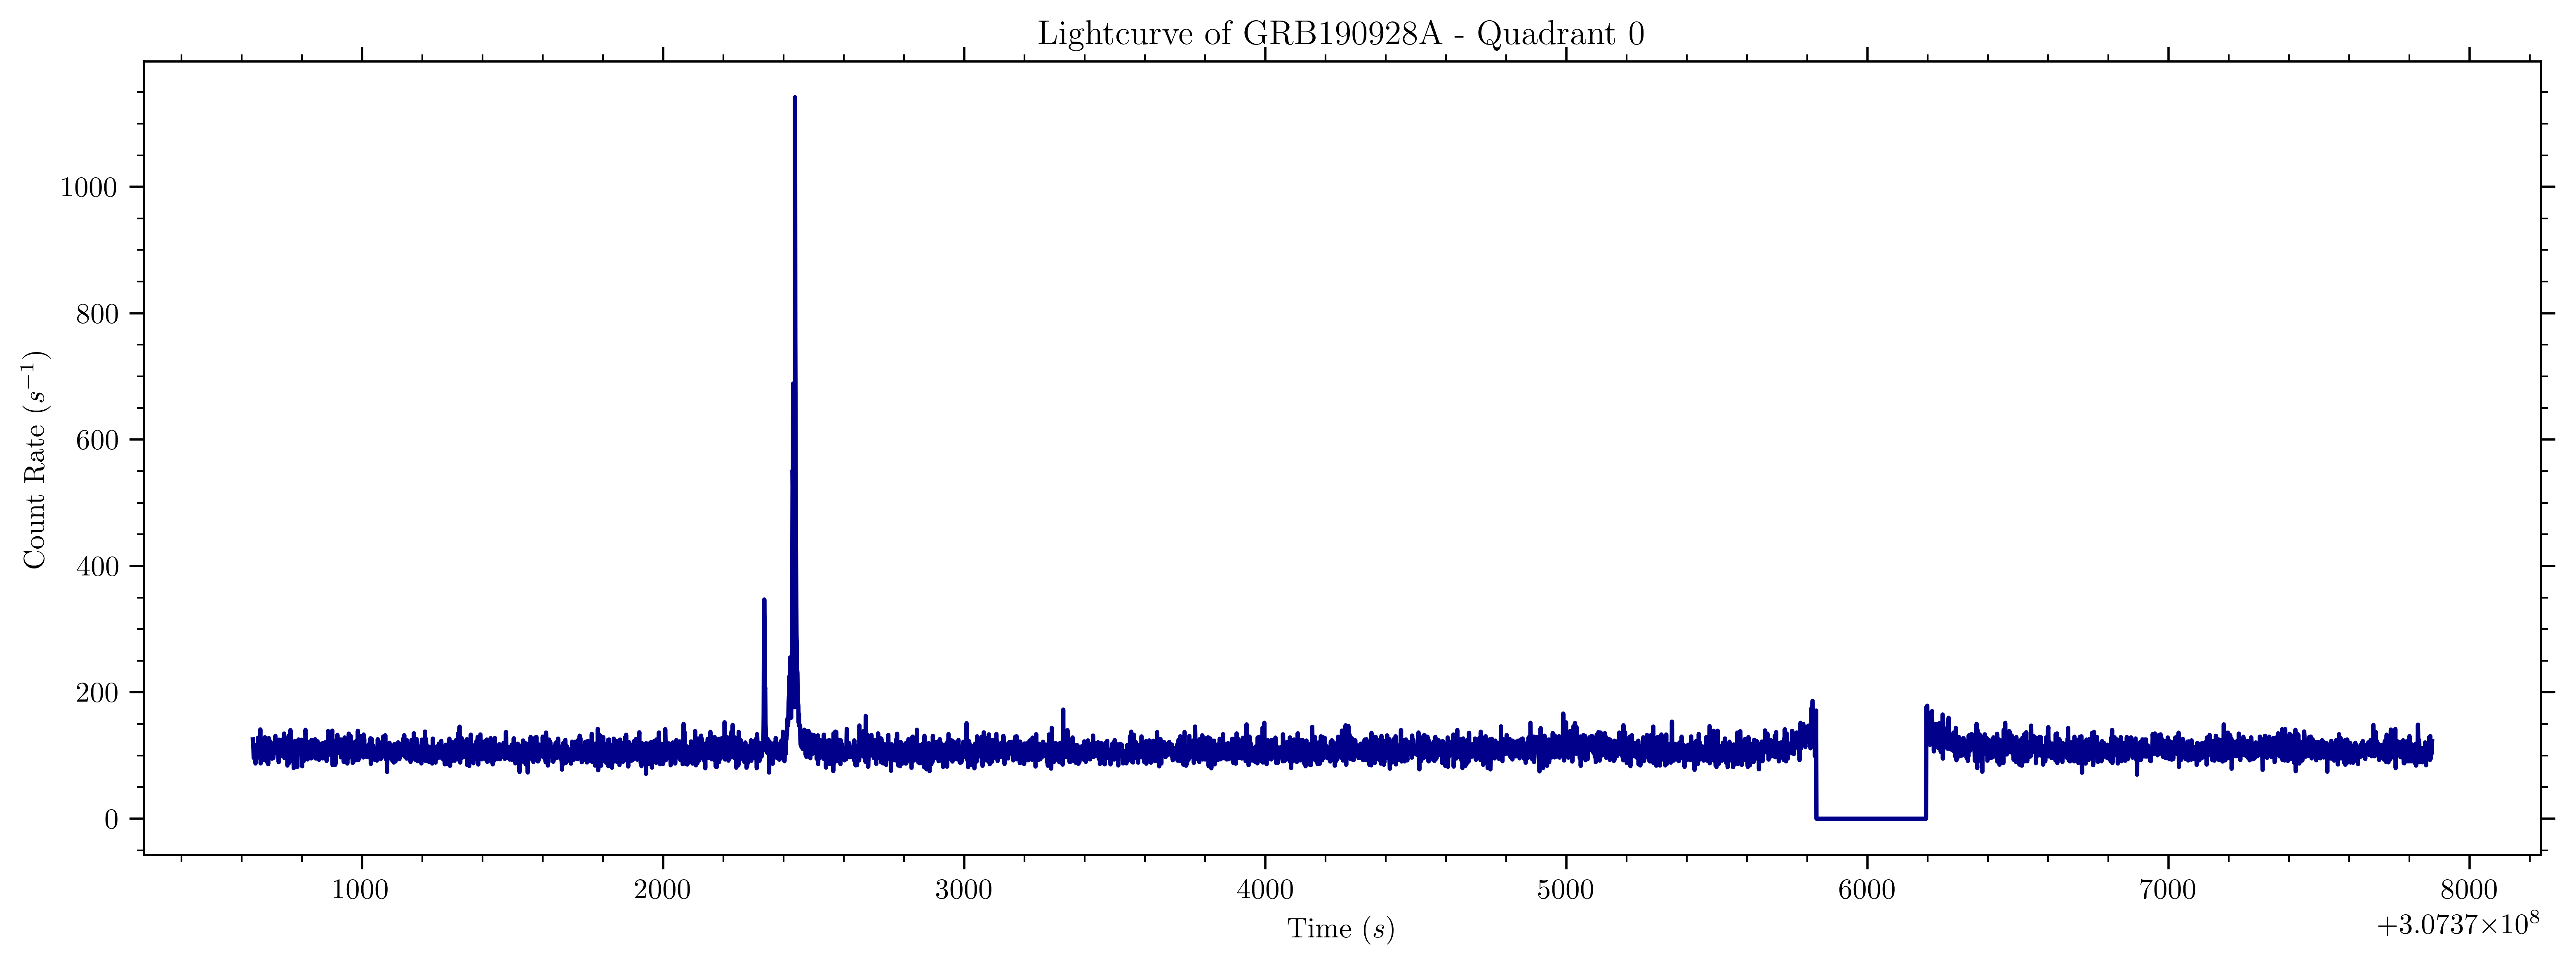

In [5]:
plt.figure(dpi=500, figsize=(15,5))
plt.plot(lc[0].field('TIME'), lc[0].field('RATE'), c='darkblue')
plt.title('Lightcurve of GRB190928A - Quadrant 0')
plt.xlabel('Time $(s)$')
plt.ylabel('Count Rate $(s^{-1})$')
plt.show()

In [6]:
saa_indices = np.array([np.where(lc[i].field('RATE') == 0) for i in range(0,4)])
saa_start_ind = saa_indices[0][0][0] -1
saa_end_ind = saa_indices[0][0][-1] +1

In [7]:
def detrend_func(lc_data):
    saa_indices = np.array([np.where(lc_data.field('RATE') == 0) for i in range(0,4)])
    saa_start_ind = saa_indices[0][0][0] -1
    saa_end_ind = saa_indices[0][0][-1] + 1
    max_ind = int(np.where(lc_data.field('RATE') == np.max(lc_data.field('RATE')))[0])
    lc_detrend = np.zeros_like(lc_data.field('RATE'))
    lc_detrend[(max_ind-120):(max_ind+30)] = lc_data.field('RATE')[(max_ind-120):(max_ind+30)] - np.median(lc_data.field('RATE')[:(max_ind-125)])
    lc_detrend[:(max_ind-120)] = lc_data.field('RATE')[:(max_ind-120)] - signal.savgol_filter(lc_data.field('RATE')[:(max_ind-120)], 100, 2)
    lc_detrend[(max_ind+30):saa_start_ind] = lc_data.field('RATE')[(max_ind+30):saa_start_ind] - signal.savgol_filter(lc_data.field('RATE')[(max_ind+30):saa_start_ind], 100, 2)
    lc_detrend[saa_end_ind:] = lc_data.field('RATE')[saa_end_ind:] - signal.savgol_filter(lc_data.field('RATE')[saa_end_ind:], 100, 2)
    return(lc_detrend)

In [8]:
max_ind = int(np.where(lc[0].field('RATE') == np.max(lc[0].field('RATE')))[0])

In [9]:
mean, median, stddev = sigma_clipped_stats(lc[0].field('RATE'))

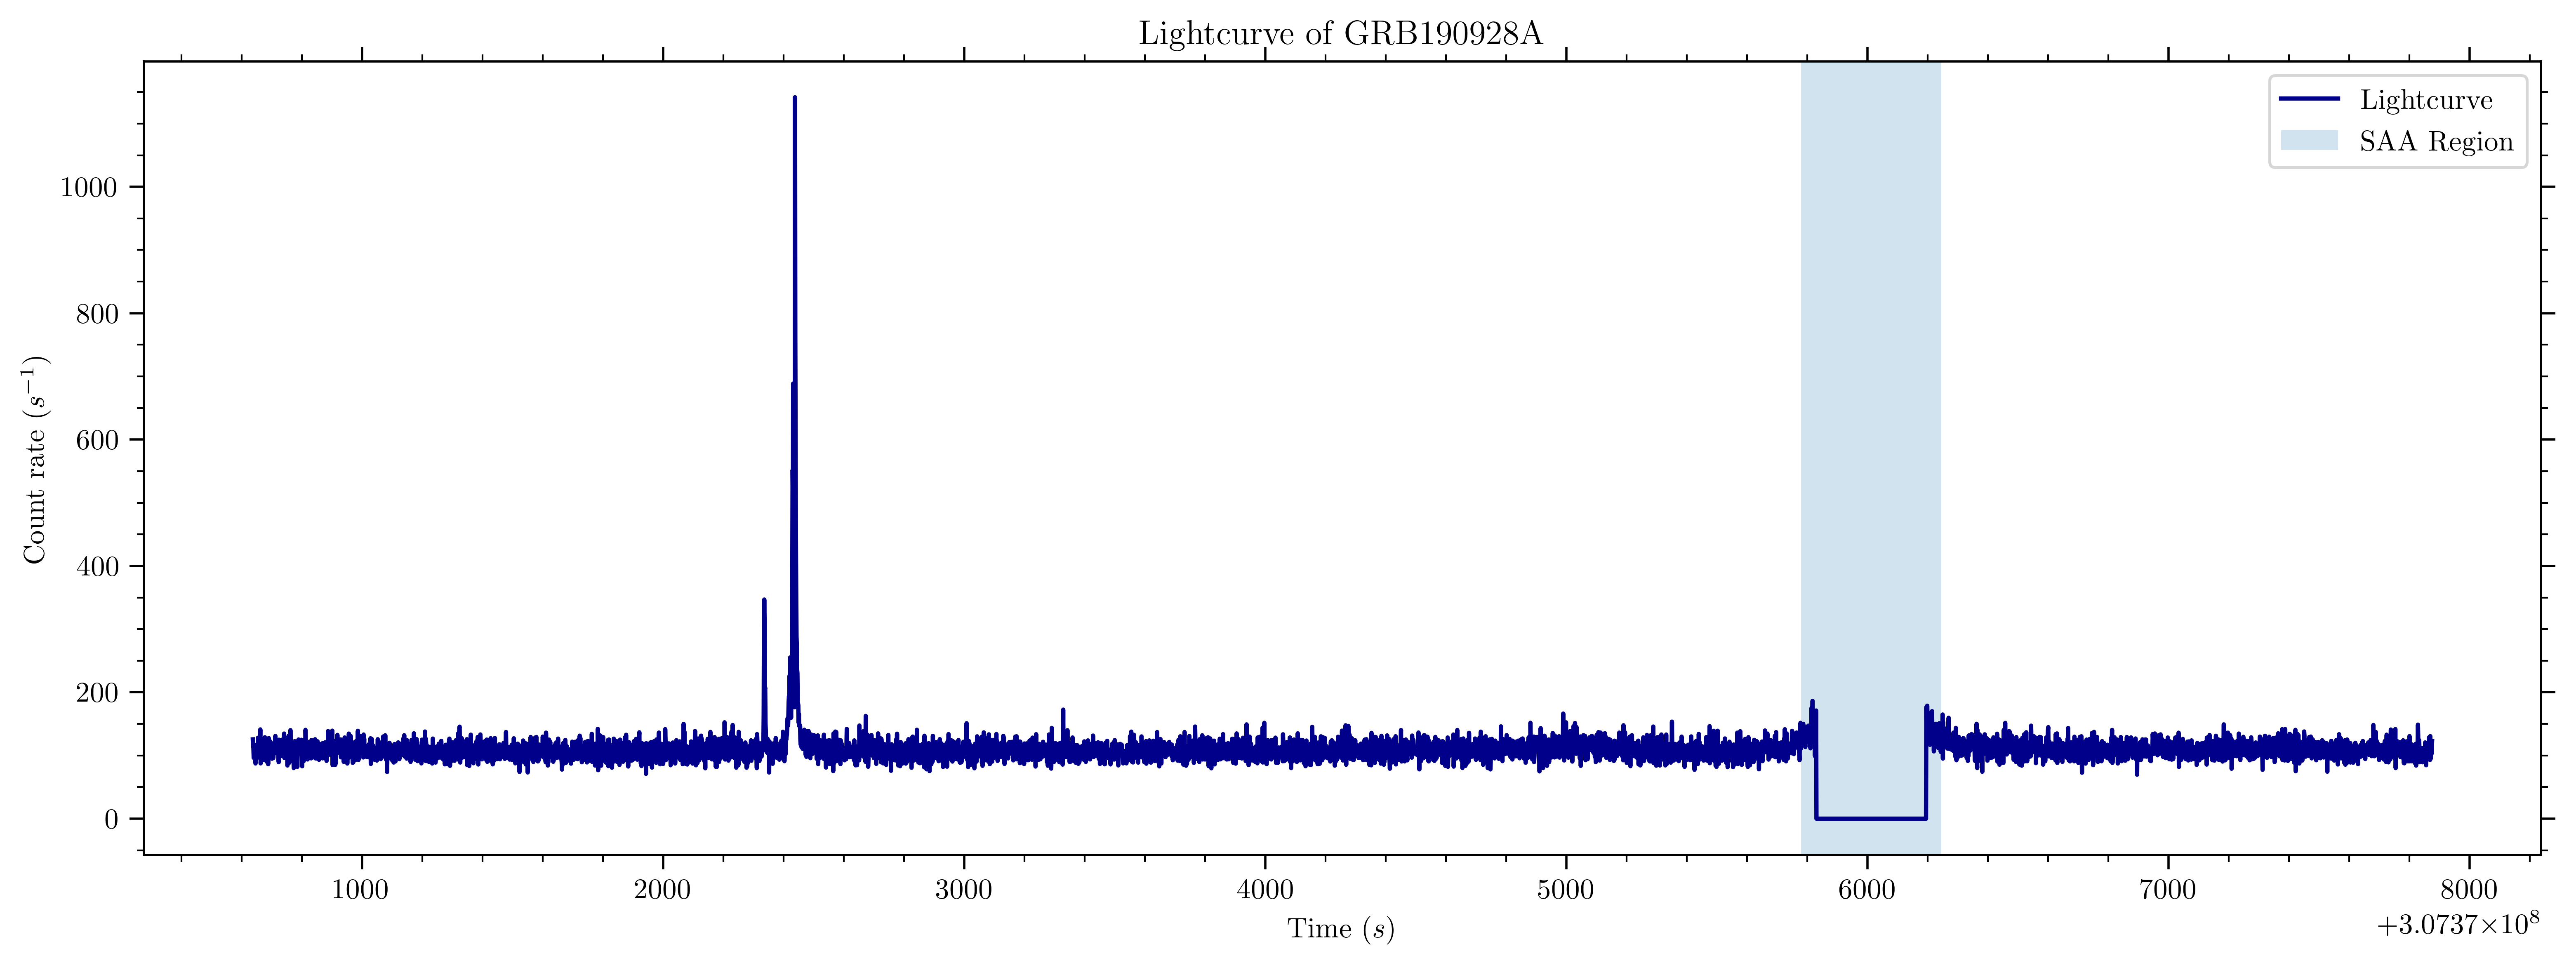

In [10]:
plt.figure(dpi=500, figsize=(15,5))
plt.plot(lc[0].field('TIME'), lc[0].field('RATE'), c='darkblue')
plt.title('Lightcurve of GRB190928A')
plt.xlabel('Time $(s)$')
plt.ylabel('Count rate $(s^{-1})$')
plt.axvspan(lc[0].field('TIME')[saa_start_ind-50], lc[0].field('TIME')[saa_end_ind+50], alpha=0.2)
plt.legend(['Lightcurve', 'SAA Region'])
plt.show()

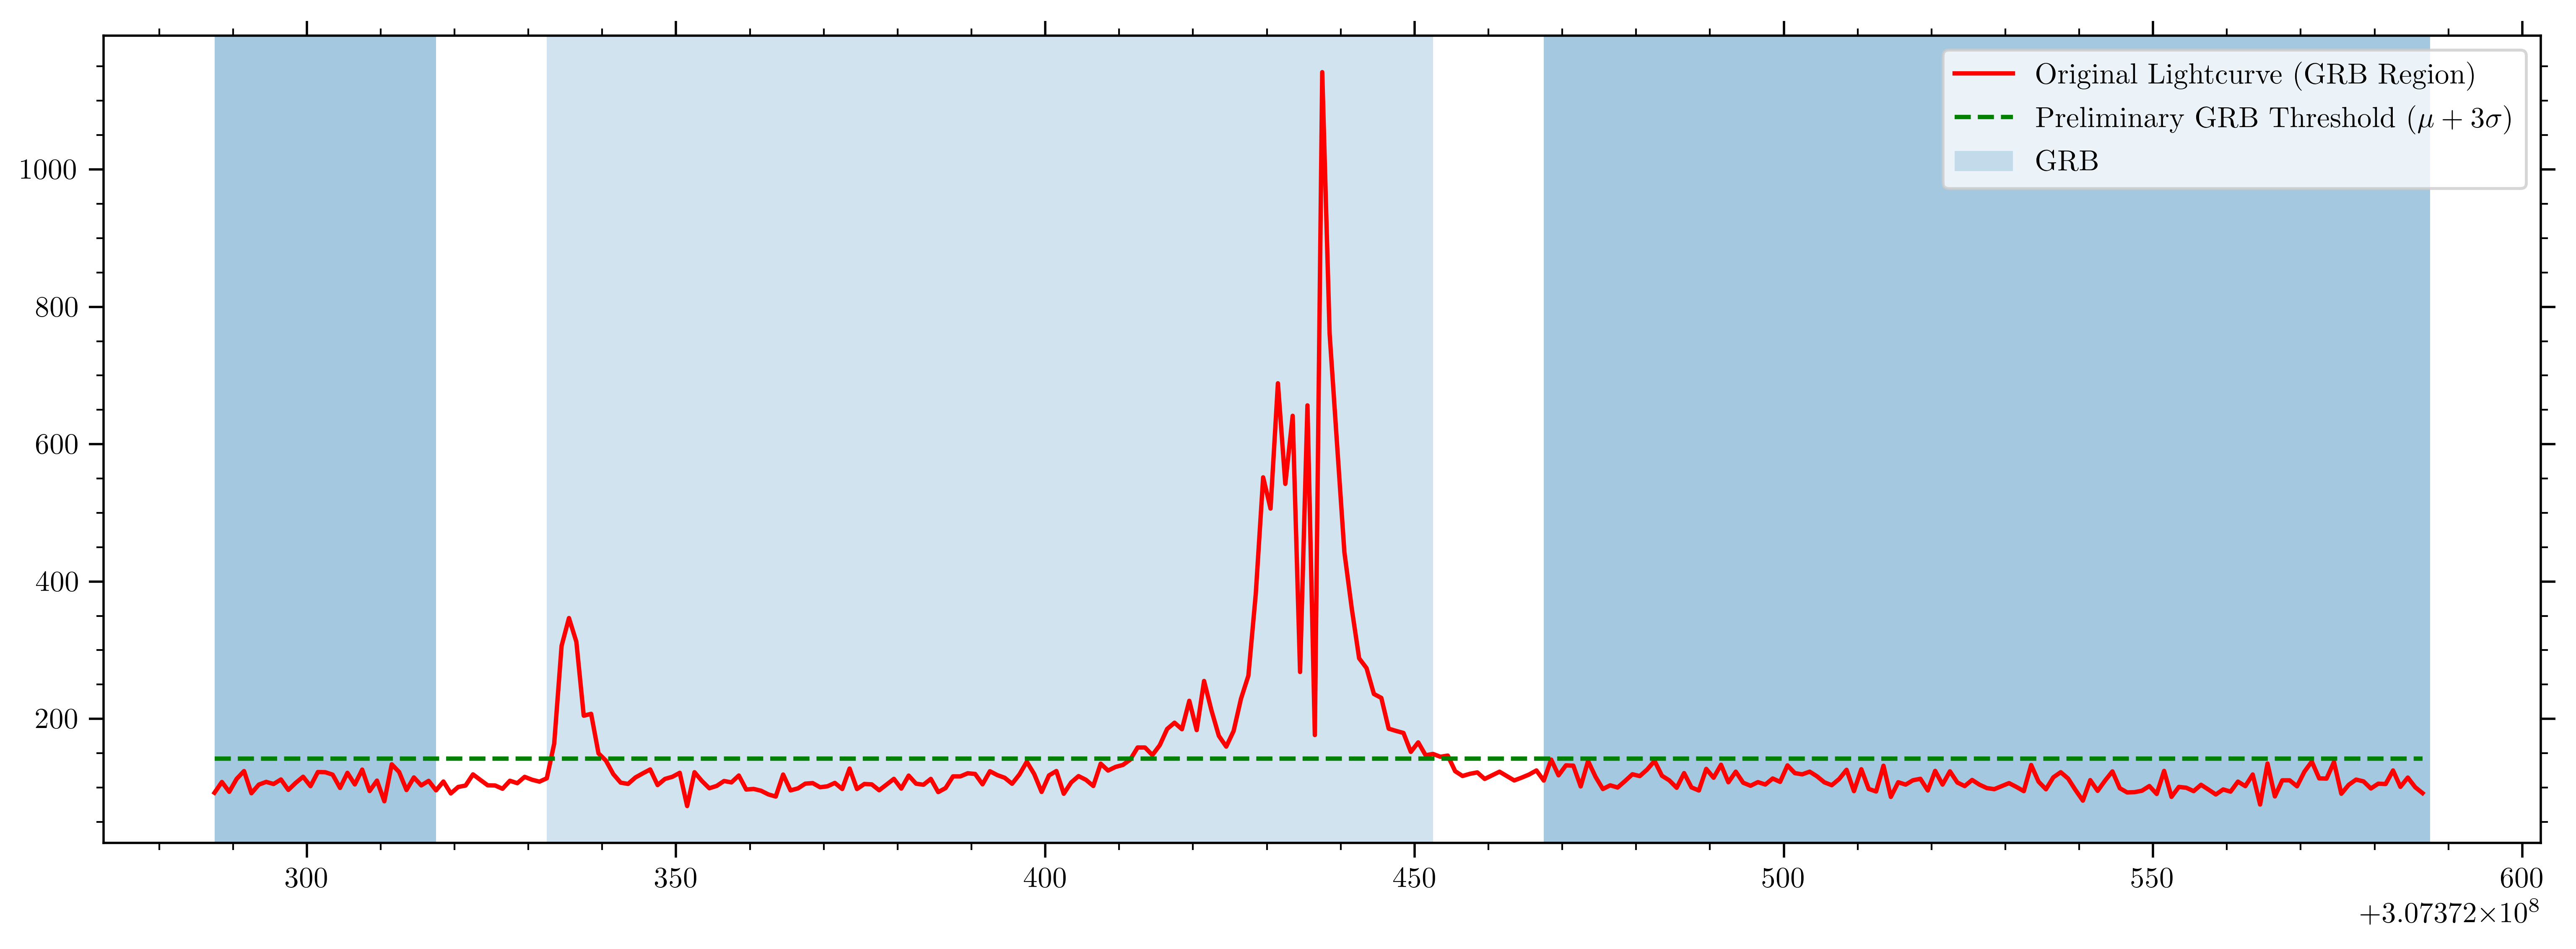

In [11]:
plt.figure(dpi=500, figsize=(15,5))
plt.plot(lc[0].field('TIME')[max_ind-150:max_ind+150], lc[0].field('RATE')[max_ind-150:max_ind+150], c='red')
plt.plot(lc[0].field('TIME')[max_ind-150:max_ind+150], (median+3*stddev)*np.ones_like(lc[0].field('TIME')[max_ind-150:max_ind+150]), 'g--')
#plt.scatter(lc[0].field('TIME')[max_ind-25:max_ind+15], lc[0].field('RATE')[max_ind-25:max_ind+15], edgecolors='g', s=15, facecolors='none')
plt.axvspan(lc[0].field('TIME')[max_ind-105], lc[0].field('TIME')[max_ind+15], alpha=0.2)
plt.legend(['Original Lightcurve (GRB Region)', 'Preliminary GRB Threshold ($\mu+3\sigma$)', 'GRB'])
plt.axvspan(lc[0].field('TIME')[max_ind-150], lc[0].field('TIME')[max_ind-120], alpha=0.4)
plt.axvspan(lc[0].field('TIME')[max_ind+30], lc[0].field('TIME')[max_ind+150], alpha=0.4)
plt.show()

In [12]:
lc_detrend = np.zeros_like(lc[0].field('RATE'))
lc_detrend[(max_ind-120):(max_ind+30)] = lc[0].field('RATE')[(max_ind-120):(max_ind+30)] - np.median(lc[0].field('RATE')[:(max_ind-125)])
lc_detrend[:(max_ind-120)] = lc[0].field('RATE')[:(max_ind-120)] - signal.savgol_filter(lc[0].field('RATE')[:(max_ind-120)], 100, 2)
lc_detrend[(max_ind+30):saa_start_ind] = lc[0].field('RATE')[(max_ind+30):saa_start_ind] - signal.savgol_filter(lc[0].field('RATE')[(max_ind+30):saa_start_ind], 100, 2)
lc_detrend[saa_end_ind:] = lc[0].field('RATE')[saa_end_ind:] - signal.savgol_filter(lc[0].field('RATE')[saa_end_ind:], 100, 2)

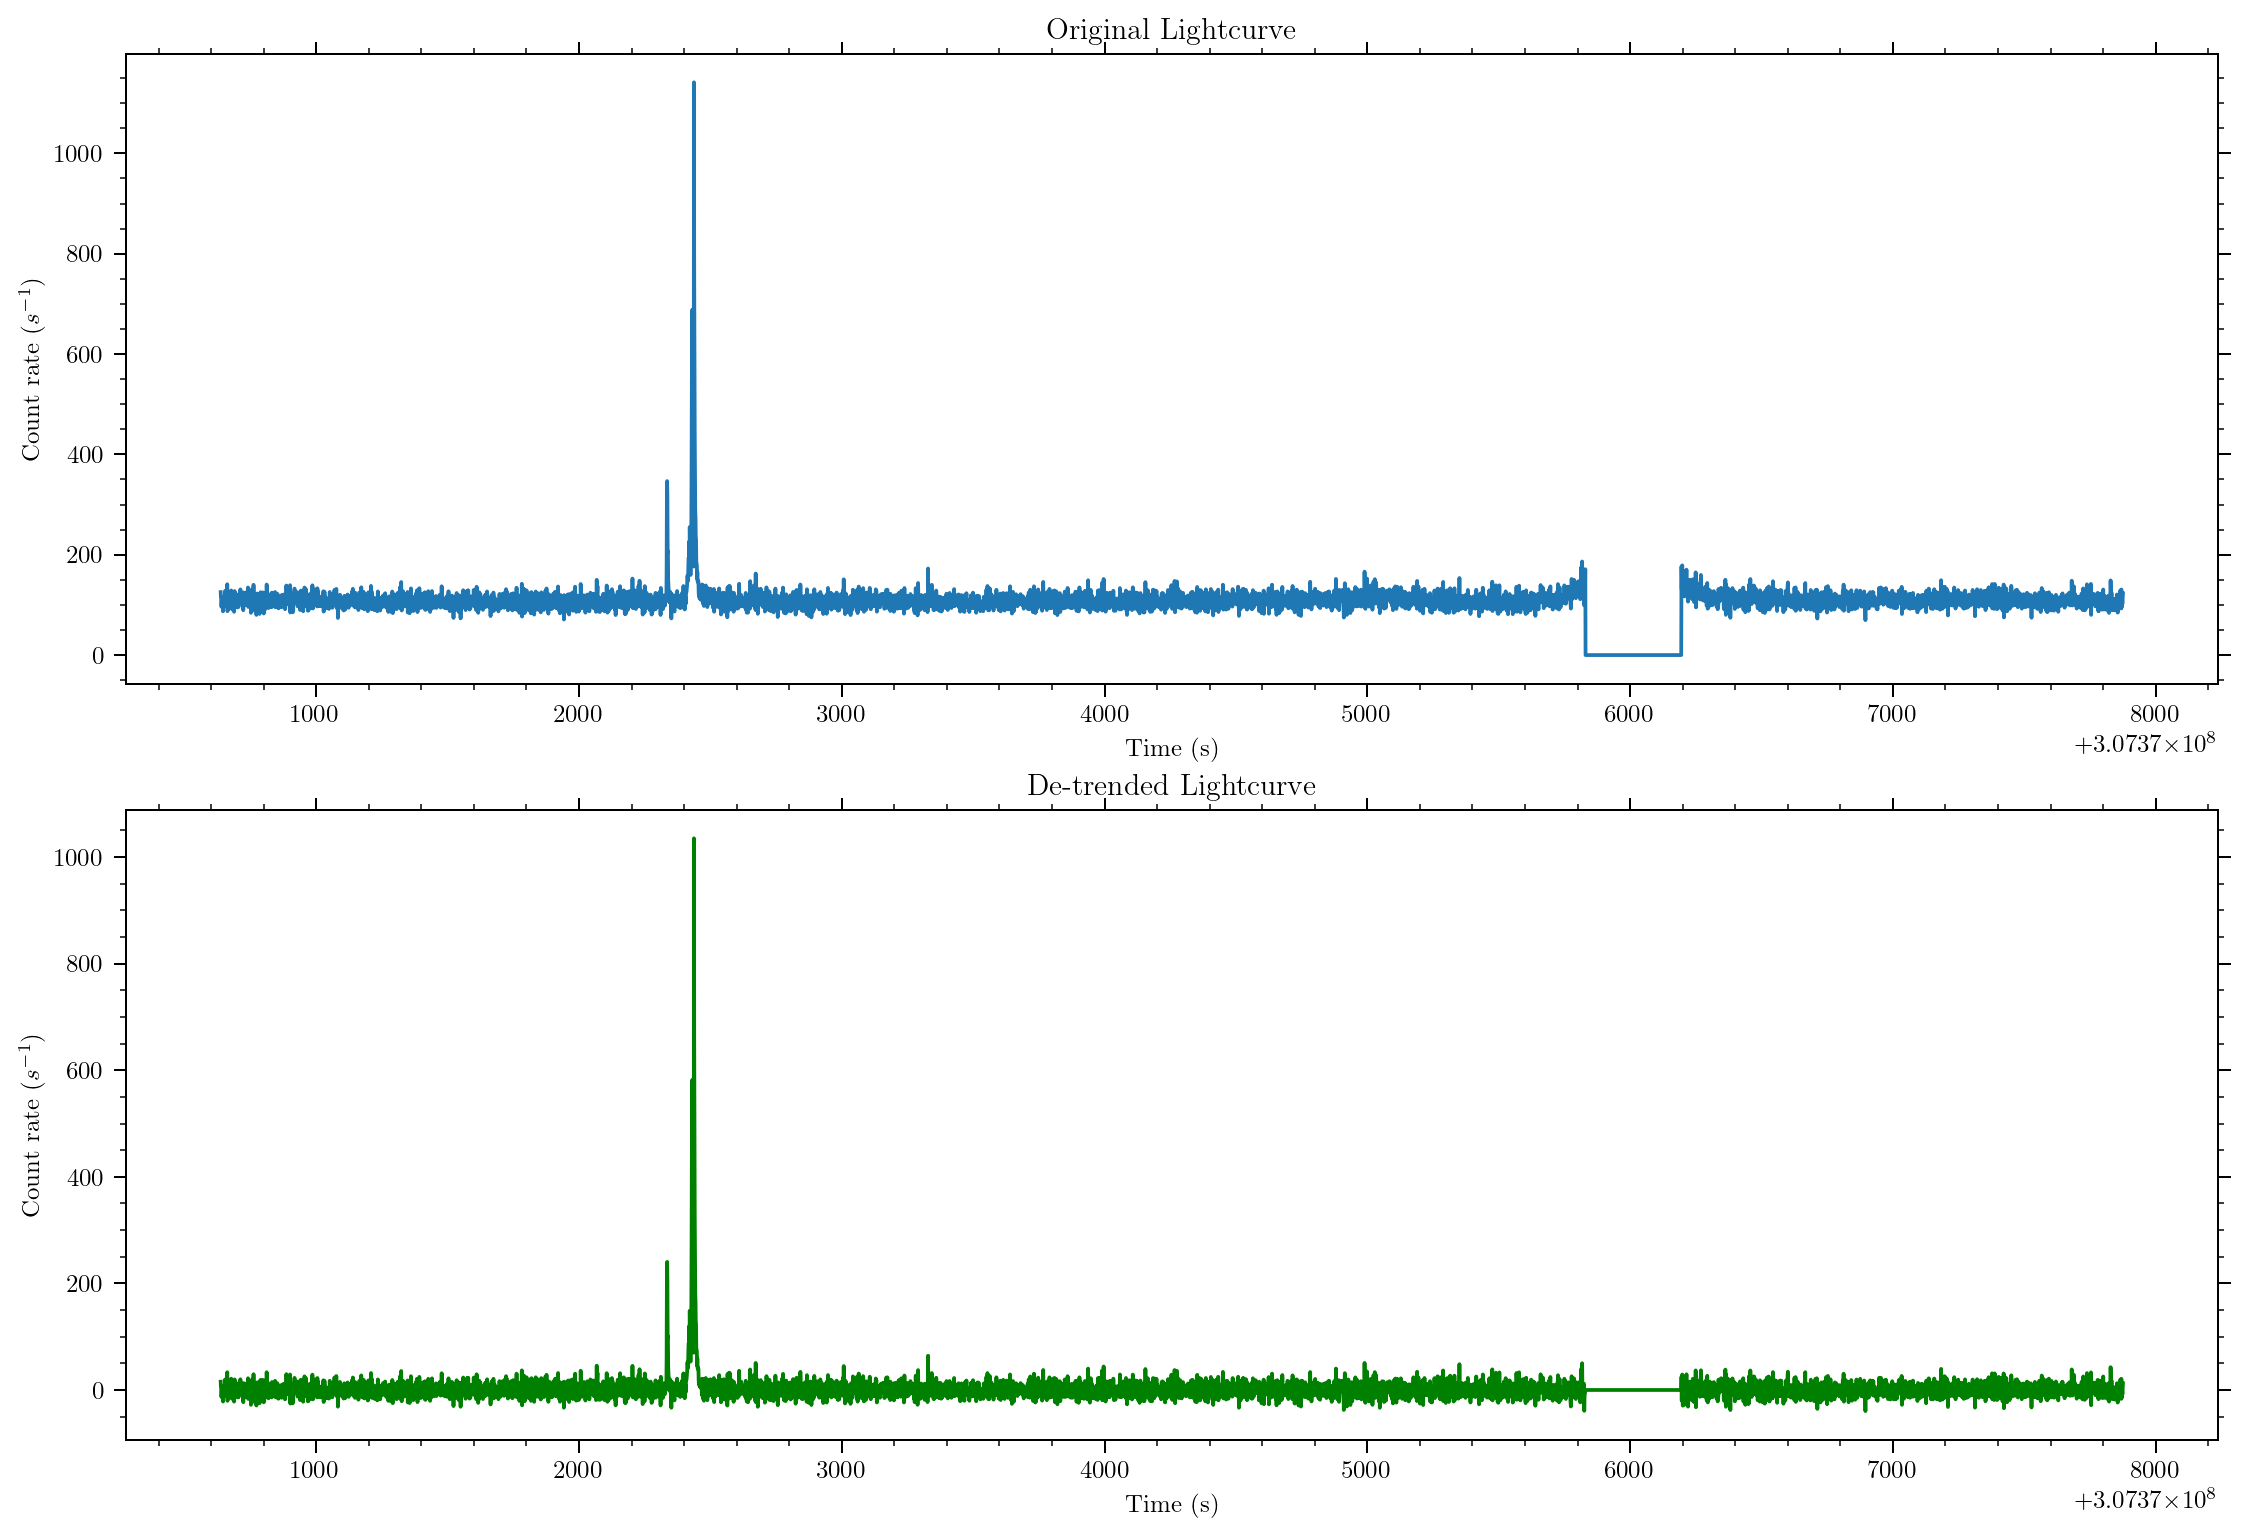

In [13]:
plt.figure(dpi=180, figsize=(15,10))
plt.subplot(2,1,1)
plt.title('Original Lightcurve')
plt.plot(lc[0].field('TIME'), lc[0].field('RATE'))
plt.xlabel('Time (s)')
plt.ylabel('Count rate (${s}^{-1}$)')
plt.subplot(2,1,2)
plt.title('De-trended Lightcurve')
plt.plot(lc[0].field('TIME'), lc_detrend, 'g')
plt.xlabel('Time (s)')
plt.ylabel('Count rate (${s}^{-1}$)')
plt.show()

In [14]:
def gauss_f(x, A, mu, sigma, c):
    return(A*np.exp(-(x-mu)**2)/(2*sigma**2) +c)

hist, bins = np.histogram(lc[0].field('RATE')[max_ind+15:saa_start_ind-20], bins=200)
# curve_fit

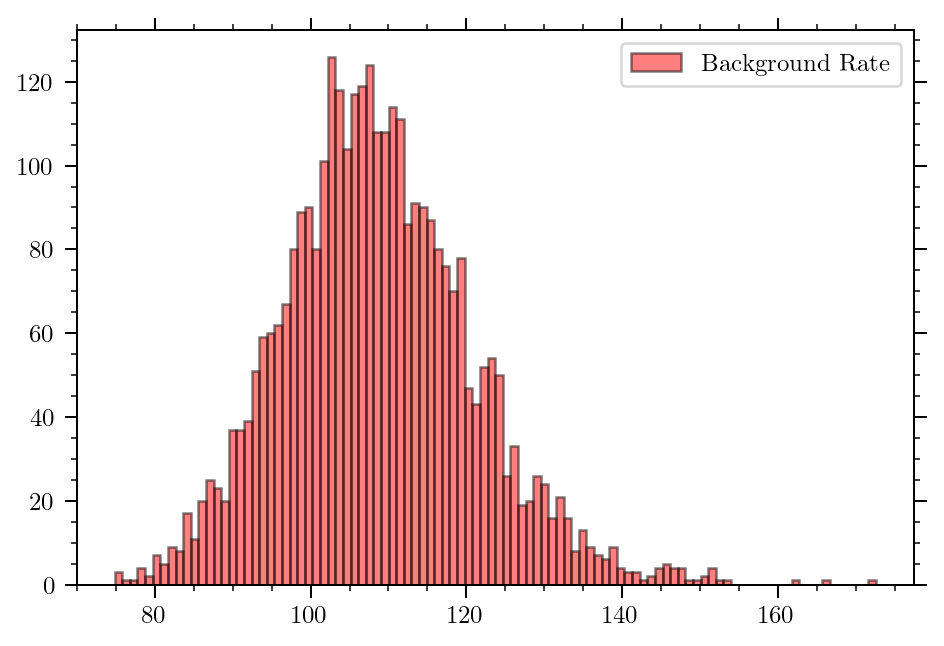

In [15]:
plt.figure(dpi=180, figsize=(6,4))
plt.hist(lc[0].field('RATE')[max_ind+15:saa_start_ind-20], bins=100, edgecolor='black', color='red', alpha=0.5)
plt.legend(['Background Rate'])
plt.show()

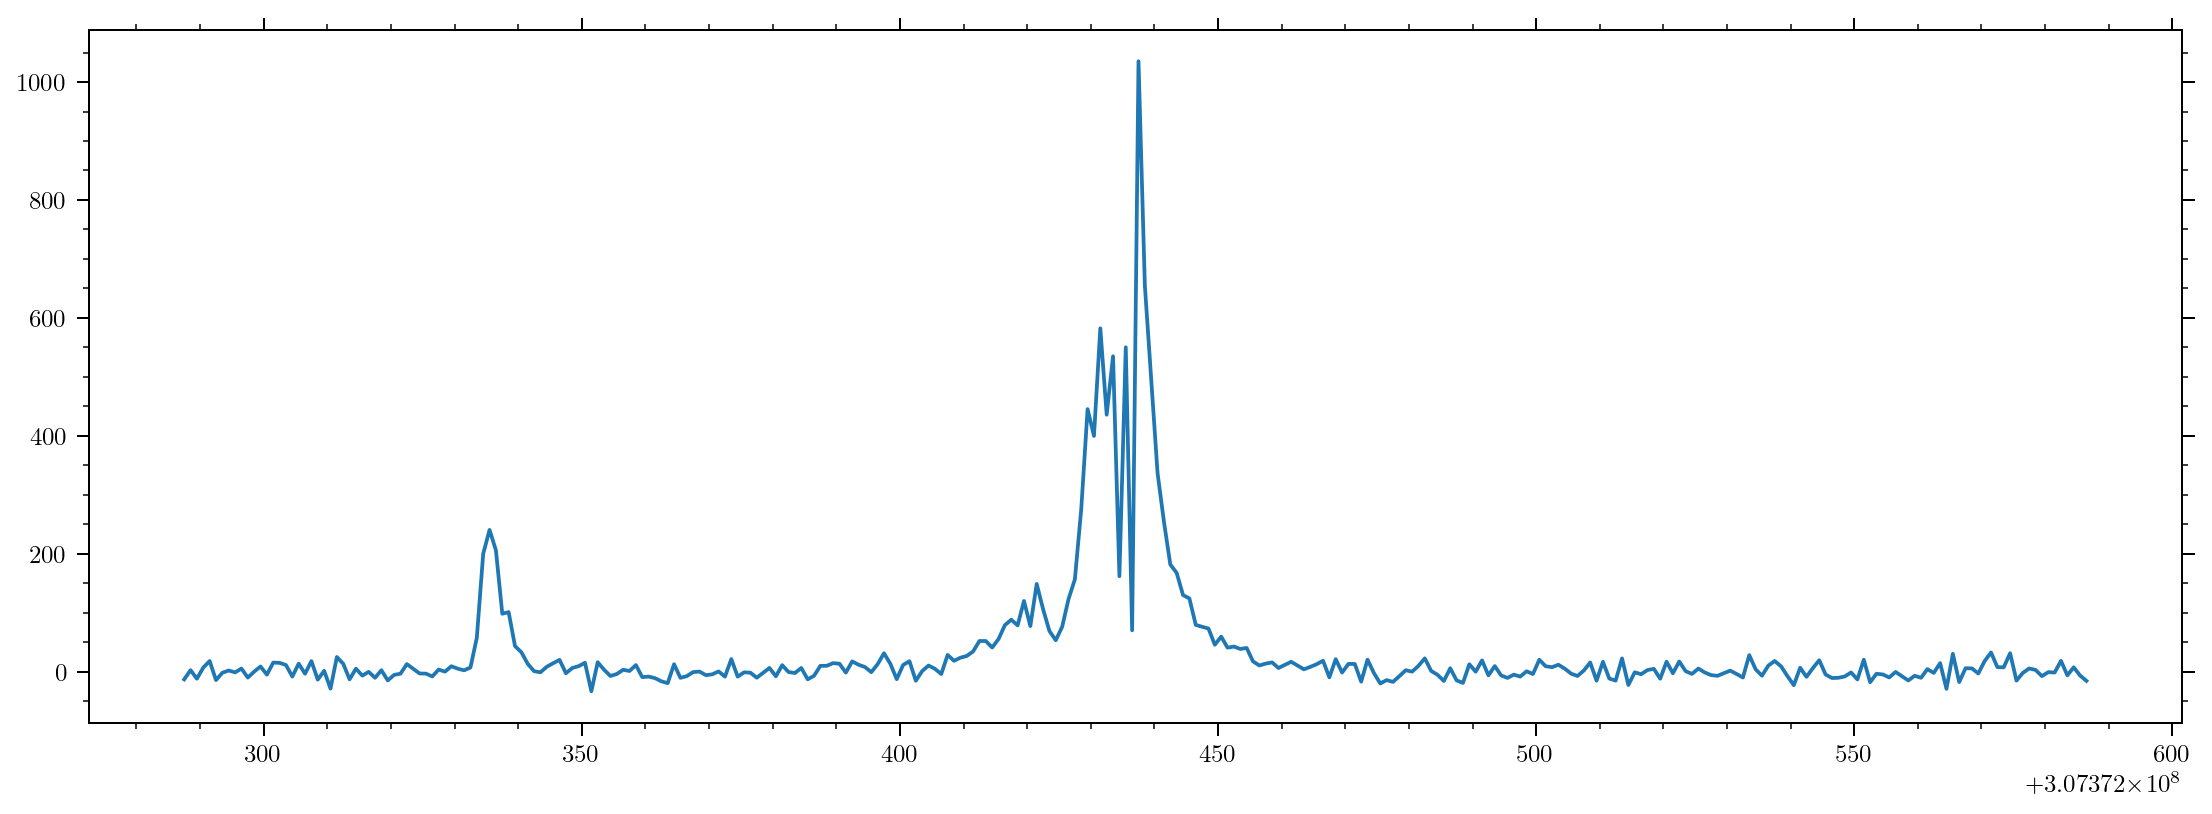

In [16]:
plt.figure(dpi=180, figsize=(15,5))
plt.plot(lc[0].field('TIME')[(max_ind-150):(max_ind+150)], lc_detrend[(max_ind-150):(max_ind+150)])
plt.show()

In [17]:
signal_peak_1 = np.max(lc_detrend)
noise_rms_1 = np.sqrt(np.sum(lc_detrend[max_ind+15:saa_start_ind-20]**2)/np.size(lc_detrend[max_ind+15:saa_start_ind-20]))
print("Signal-to-noise ratio (Q0) is given as: "+str(signal_peak_1/noise_rms_1))
signal_peak_2 = np.max(lc_detrend)
noise_rms_2 = np.sqrt(np.sum(lc_detrend[max_ind+15:saa_start_ind-20]**2)/np.size(lc_detrend[max_ind+15:saa_start_ind-20]))
print("Signal-to-noise ratio (Q0) is given as: "+str(signal_peak_1/noise_rms_1))
signal_peak_3 = np.max(lc_detrend)
noise_rms_3 = np.sqrt(np.sum(lc_detrend[max_ind+15:saa_start_ind-20]**2)/np.size(lc_detrend[max_ind+15:saa_start_ind-20]))
print("Signal-to-noise ratio (Q0) is given as: "+str(signal_peak_1/noise_rms_1))
signal_peak_1 = np.max(lc_detrend)
noise_rms_1 = np.sqrt(np.sum(lc_detrend[max_ind+15:saa_start_ind-20]**2)/np.size(lc_detrend[max_ind+15:saa_start_ind-20]))
print("Signal-to-noise ratio (Q0) is given as: "+str(signal_peak_1/noise_rms_1))

Signal-to-noise ratio (Q0) is given as: 89.51647990199982
Signal-to-noise ratio (Q0) is given as: 89.51647990199982
Signal-to-noise ratio (Q0) is given as: 89.51647990199982
Signal-to-noise ratio (Q0) is given as: 89.51647990199982


In [18]:
import plotly.express as px

In [19]:
np.size(lc[0].field('TIME')[(max_ind-150):(max_ind+150)])

300

/home/shreyas/.local/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7581: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


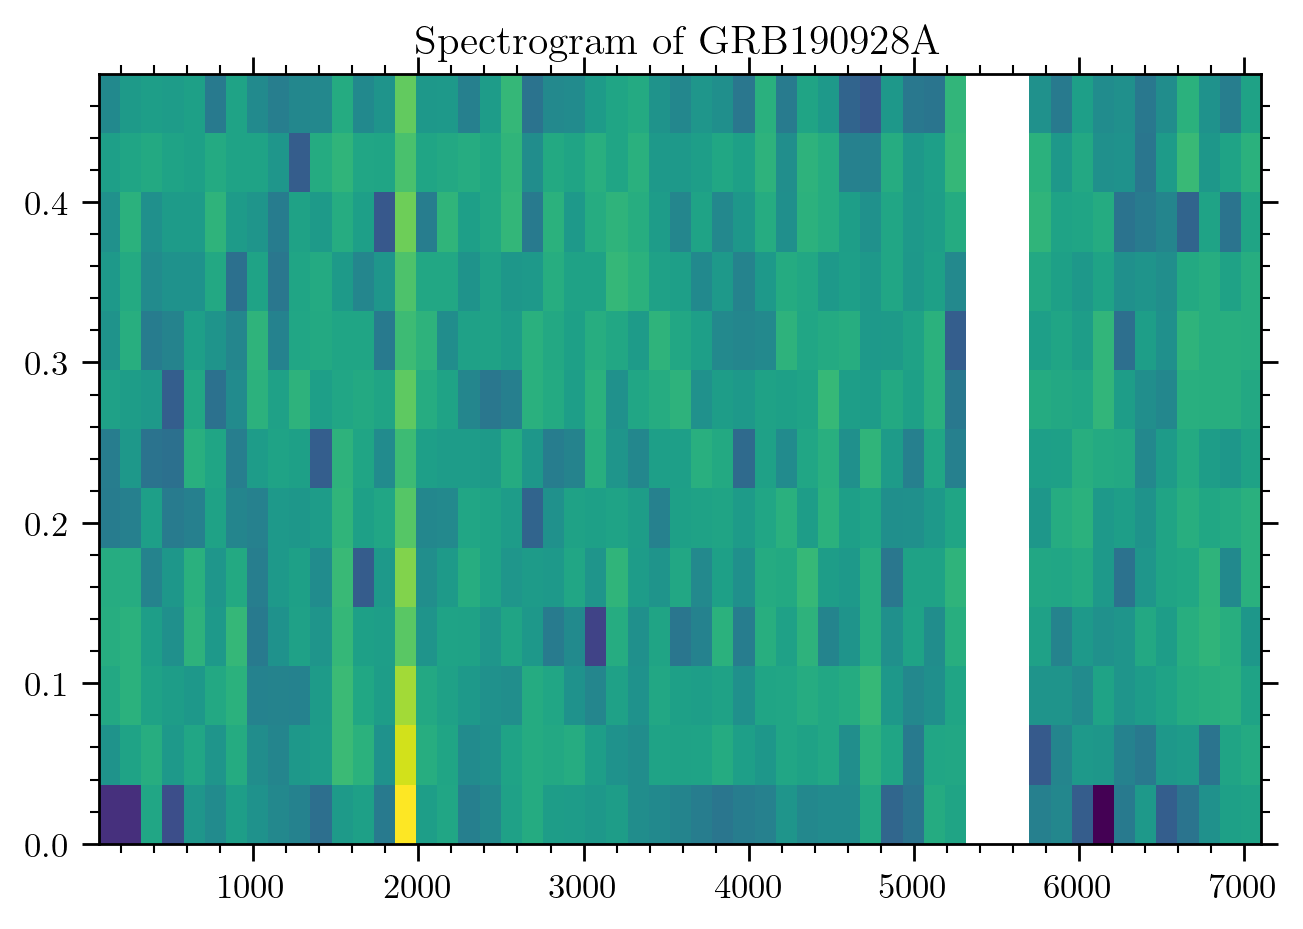

In [20]:
plt.figure(dpi=250, figsize=(6,4))
plt.title('Spectrogram of GRB190928A')
plt.specgram(lc_detrend, Fs=1, pad_to=25, cmap='viridis')
plt.show()

In [21]:
f, t, sxx = signal.spectrogram(lc_detrend[(max_ind-150):(max_ind+150)], 1)

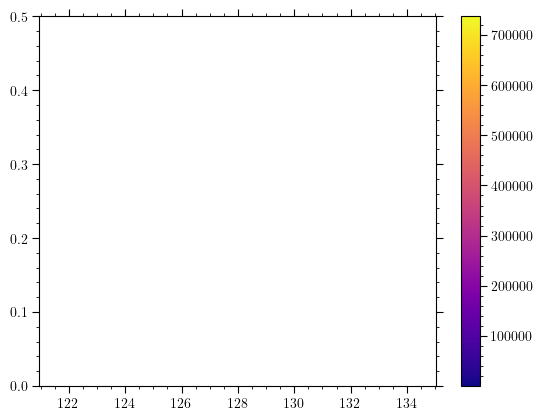

In [22]:
plt.pcolormesh(t, f, sxx, shading='gouraud', cmap='plasma')
plt.colorbar()
plt.show()

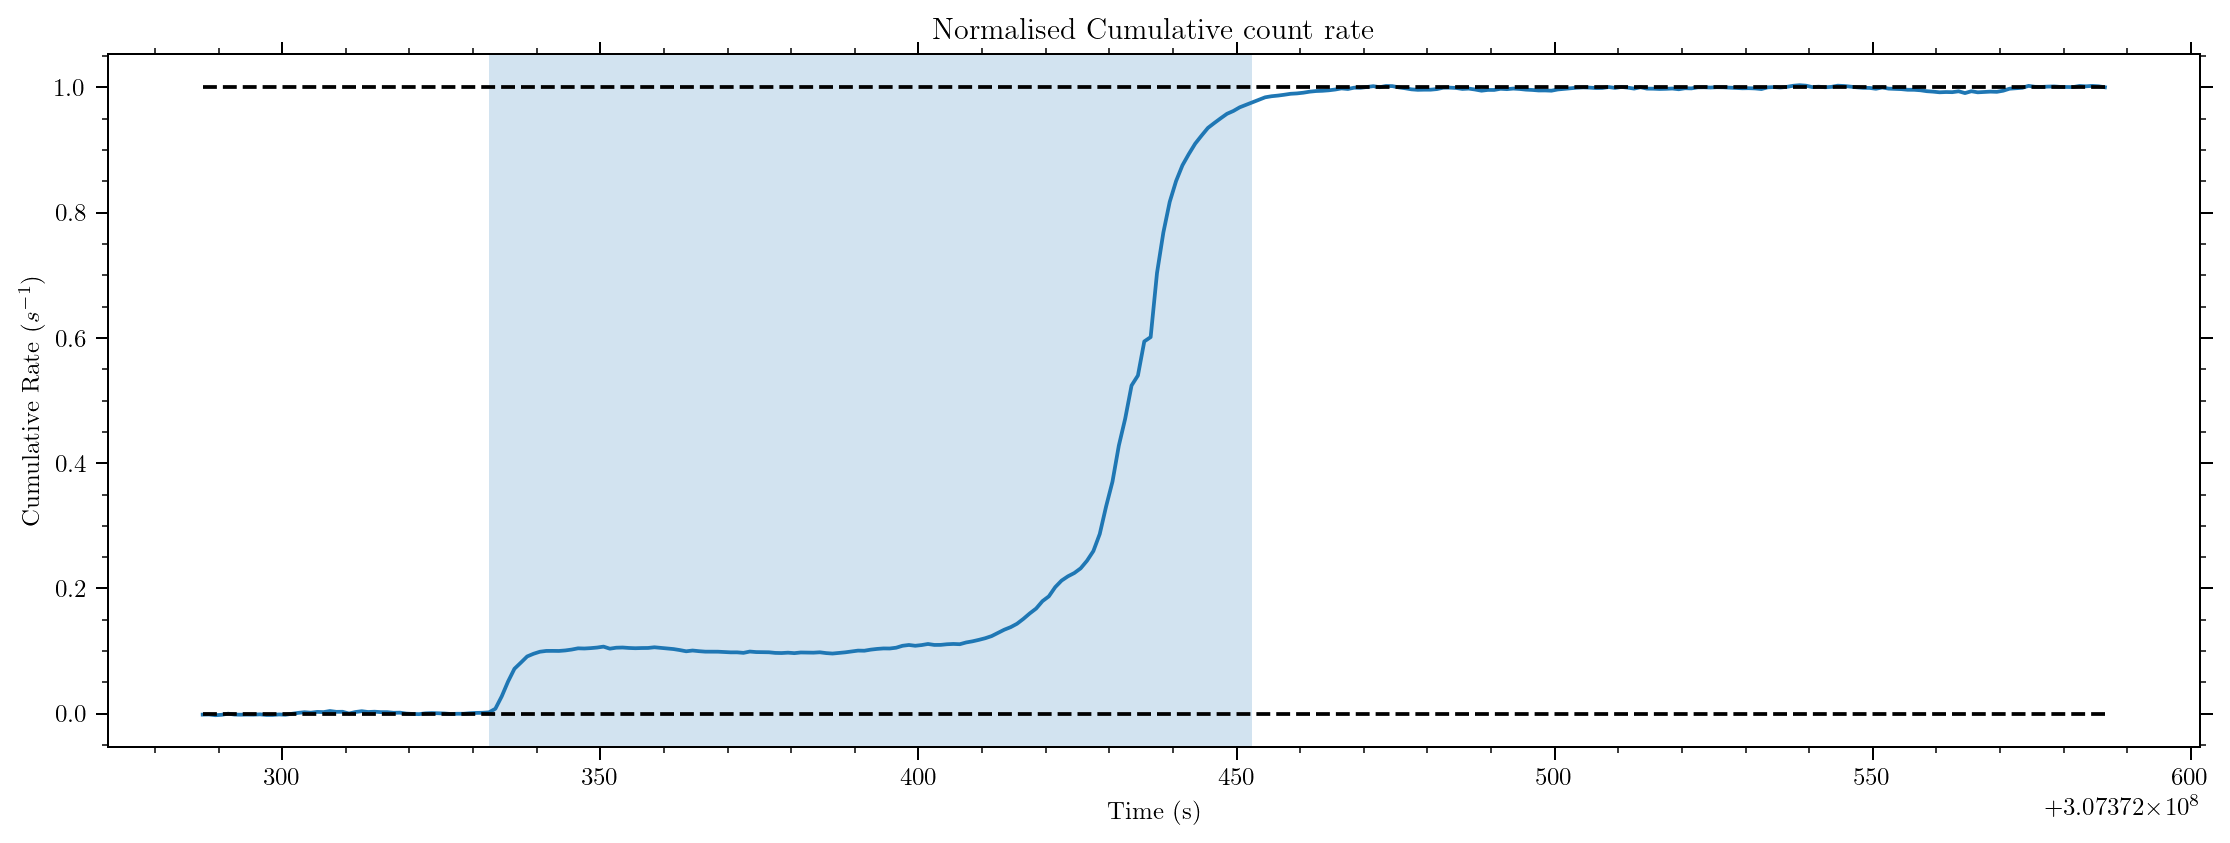

In [23]:
plt.figure(dpi=180, figsize=(15,5))
plt.plot(lc[0].field('TIME')[(max_ind-150):(max_ind+150)],np.cumsum(lc_detrend[(max_ind-150):(max_ind+150)])/np.sum(lc_detrend[(max_ind-150):(max_ind+150)]))
plt.plot(lc[0].field('TIME')[(max_ind-150):(max_ind+150)], np.zeros(300), 'k--')
plt.plot(lc[0].field('TIME')[(max_ind-150):(max_ind+150)], np.ones(300), 'k--')
plt.axvspan(lc[0].field('TIME')[max_ind-105], lc[0].field('TIME')[max_ind+15], alpha=0.2)
plt.title('Normalised Cumulative count rate')
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Rate $(s^{-1}$)')
plt.show()